<a id='plotting'></a>
***
<h2><center> Plotting Results </center><h2>

In [76]:
import os
import pandas as pd
import geopandas as gpd
import contextily as ctx
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=20,20

from pyincore import IncoreClient, Dataset, FragilityService, MappingSet, DataService
from pyincore.analyses.buildingdamage import BuildingDamage
from pyincore.analyses.cumulativebuildingdamage import CumulativeBuildingDamage
from pyincore.analyses.populationdislocation import PopulationDislocation, PopulationDislocationUtil
from pyincore.analyses.housingunitallocation import HousingUnitAllocation
client = IncoreClient()

Enter username: tarunadluri
Enter password: ········
Connection successful to IN-CORE services. pyIncore version detected: 0.9.0


###### LOADING THE SOLUTION FILES

In [77]:
qt500 = pd.read_csv("Optimization_Model/seaside_qt_data_500.csv")
qt1000 = pd.read_csv("Optimization_Model/seaside_qt_data_1000.csv")
sc500 = pd.read_csv("Optimization_Model/seaside_sc_data_500.csv")
sc1000 = pd.read_csv("Optimization_Model/seaside_sc_data_1000.csv")

In [78]:
yr500B20 = pd.read_csv("Optimization_Model/500_yr_Results/results_B20_.csv")
yr500B40 = pd.read_csv("Optimization_Model/500_yr_Results/results_B40_.csv")
yr500B60 = pd.read_csv("Optimization_Model/500_yr_Results/results_B60_.csv")
yr1000B20 = pd.read_csv("Optimization_Model/1000_yr_Results/results_B20_.csv")
yr1000B40 = pd.read_csv("Optimization_Model/1000_yr_Results/results_B40_.csv")
yr1000B60 = pd.read_csv("Optimization_Model/1000_yr_Results/results_B60_.csv")

##### 20% Budget Options ($40,000,000)

In [80]:
Op1_500B20 = pd.read_csv("Optimization_Model/500_yr_Results/decision_variable_B20_X0.csv")
Op2_500B20 = pd.read_csv("Optimization_Model/500_yr_Results/decision_variable_B20_X79.csv")
Op3_500B20 = pd.read_csv("Optimization_Model/500_yr_Results/decision_variable_B20_X42.csv")
Op1_1000B20 = pd.read_csv("Optimization_Model/1000_yr_Results/decision_variable_B20_X0.csv")
Op2_1000B20 = pd.read_csv("Optimization_Model/1000_yr_Results/decision_variable_B20_X199.csv")
Op3_1000B20 = pd.read_csv("Optimization_Model/1000_yr_Results/decision_variable_B20_X18.csv")

##### 40% Budget Options ($80,000,000)

In [81]:
Op1_500B40 = pd.read_csv("Optimization_Model/500_yr_Results/decision_variable_B40_X0.csv")
Op2_500B40 = pd.read_csv("Optimization_Model/500_yr_Results/decision_variable_B40_X376.csv")
Op3_500B40 = pd.read_csv("Optimization_Model/500_yr_Results/decision_variable_B40_X122.csv")
Op1_1000B40 = pd.read_csv("Optimization_Model/1000_yr_Results/decision_variable_B40_X0.csv")
Op2_1000B40 = pd.read_csv("Optimization_Model/1000_yr_Results/decision_variable_B40_X119.csv")
Op3_1000B40 = pd.read_csv("Optimization_Model/1000_yr_Results/decision_variable_B40_X196.csv")

##### 60% Budget Options ($120,000,000)

In [82]:
Op1_500B60 = pd.read_csv("Optimization_Model/500_yr_Results/decision_variable_B60_X0.csv")
Op2_500B60 = pd.read_csv("Optimization_Model/500_yr_Results/decision_variable_B60_X235.csv")
Op3_500B60 = pd.read_csv("Optimization_Model/500_yr_Results/decision_variable_B60_X44.csv")
Op1_1000B60 = pd.read_csv("Optimization_Model/1000_yr_Results/decision_variable_B60_X0.csv")
Op2_1000B60 = pd.read_csv("Optimization_Model/1000_yr_Results/decision_variable_B60_X259.csv")
Op3_1000B60 = pd.read_csv("Optimization_Model/1000_yr_Results/decision_variable_B60_X205.csv")

### Making Tables for each event

#### Reading in building polygon dataset and setting up function to filter data

In [3]:
# reading in building polygon dataset
bldg_dataset_id = "5df40388b9219c06cf8b0c80"
#bldg_dataset_id = "5d927ab2b9219c06ae8d313c"
data_service = DataService(client)
dataset = Dataset.from_data_service(bldg_dataset_id, data_service)
rd = dataset.get_inventory_reader()

# setting up geodataframe
gdf = gpd.GeoDataFrame.from_features([feature for feature in rd], crs="EPSG:3857")
gdf = gdf[['guid', 'geometry']]
gdf.dropna(subset=['guid'], inplace=True)
gdf.drop_duplicates(subset='guid', inplace=True)
gdf.set_index('guid', inplace=True)

def get_gdf_feats(gdf, path_to_run=None, values=None, k=None):
    df = pd.read_csv(path_to_run)
    df.set_index('Z', inplace=True)
    if values != None:
        df = df.loc[df['Values'].isin(values)]
    if k != None:
        df = df.loc[df['K'].isin(k)]
    gdf_new = pd.merge(gdf, df, left_index=True, right_index=True)
    return gdf_new

Dataset already exists locally. Reading from local cached zip.
Unzipped folder found in the local cache. Reading from it...


### Drawing Map

Text(0.5, 1.0, 'Retrofitting Strategy in Plan 2 with Budget $120 Million for 500year-event')

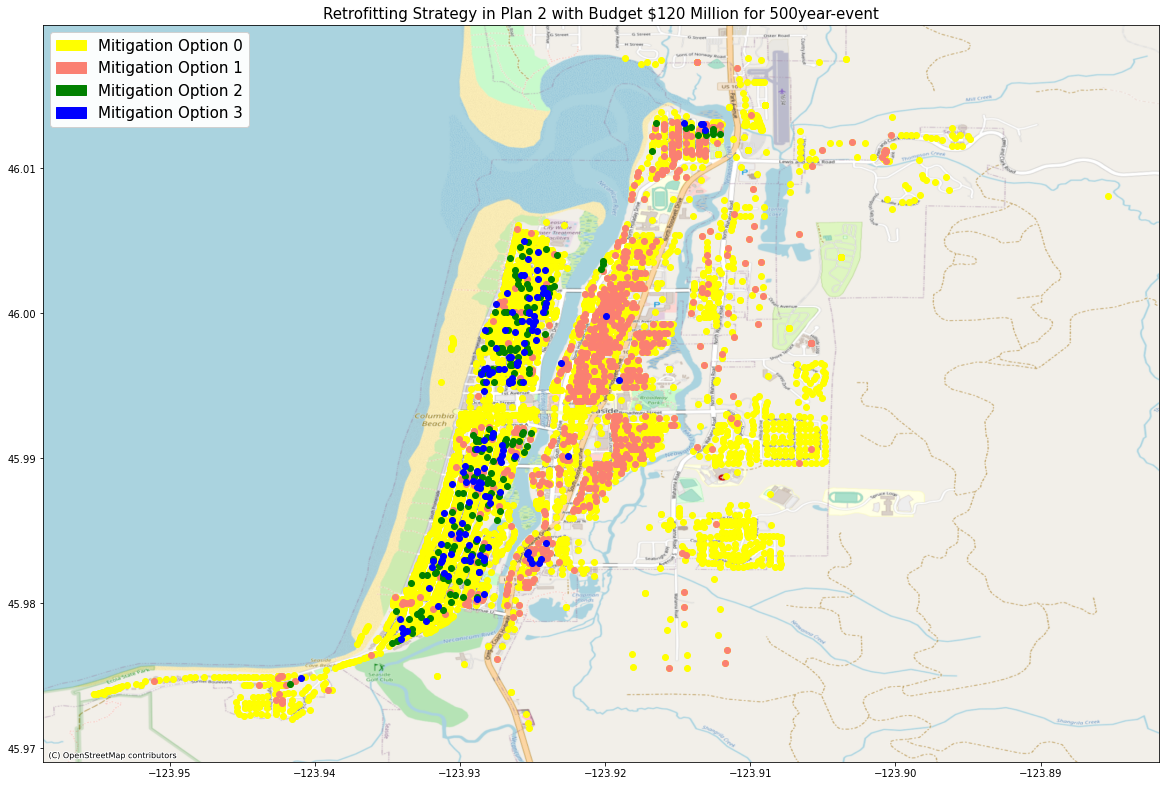

In [75]:
# --- making figure and map
fig, ax = plt.subplots(1,1)
gdf = gdf.to_crs(epsg=3857)

# plotting all parcels
gdf.plot(ax=ax, color='yellow')
abc = 'Optimization_Model/1000_yr_Results/decision_variable_B20_X18.csv'
# getting a subset of parcels
gdf_k1 = get_gdf_feats(gdf, path_to_run= abc , values=[1,2], k=[1])
gdf_k2 = get_gdf_feats(gdf, path_to_run= abc, values=[1,2], k=[2])
gdf_k3 = get_gdf_feats(gdf, path_to_run= abc, values=[1,2], k=[3])
# drawing the subset of parcels on the map
gdf_k1.plot(ax=ax, color='salmon')
gdf_k2.plot(ax=ax, color='green')
gdf_k3.plot(ax=ax, color='blue')
# adding basemap
#ctx.add_basemap(ax, zoom=15, crs='EPSG:4326', source=ctx.providers.Stamen.TonerLite)
ctx.add_basemap(ax, zoom=15, crs='EPSG:4326', source=ctx.providers.OpenStreetMap.Mapnik)
from matplotlib.legend import Legend
import matplotlib.patches as mpatches
p0 = mpatches.Patch(color='yellow')
p1 = mpatches.Patch(color='salmon')
p2 = mpatches.Patch(color='green')
p3 = mpatches.Patch(color='blue')
leg = plt.legend((p0,p1,p2,p3),('Mitigation Option 0','Mitigation Option 1','Mitigation Option 2', 'Mitigation Option 3'),loc="upper left",fontsize = 15)
ax.add_artist(leg);
ax.set_title("Retrofitting Strategy in Plan 2 with Budget $120 Million for 500year-event",fontsize = 15)